In [1]:
# load the functionality into Julia
using StatsFuns, CSV, Cubature, ProgressMeter, DataFrames, Optim, SpecialFunctions, Roots
using Distributions, DelimitedFiles, Random

using Plots, StatsPlots, ColorBrewer
pyplot()

Plots.PyPlotBackend()

In [2]:
Plots.scalefontsizes(1.2)

In [3]:
clrs = [ColorBrewer.palette("Blues", 5)[2], ColorBrewer.palette("Blues", 5)[4]];
clrs

In [4]:
# output file
results_dir = "../../results/Andrei"
results_file = "$(results_dir)/output.csv"
run(`mkdir -p $(results_dir)`)

Process(`mkdir -p ../../results/Andrei`, ProcessExited(0))

In [5]:
## The function is adopted from:
## from https://github.com/robertfeldt/BlackBoxOptim.jl/blob/master/src/utilities/latin_hypercube_sampling.jl
"""
    latin_hypercube_sampling(mins, maxs, numSamples)
    Randomly sample `numSamples` values from the parallelogram defined
    by `mins` and `maxs` using the Latin hypercube algorithm.
"""
function latin_hypercube_sampling(mins::AbstractVector{T},
                                  maxs::AbstractVector{T},
                                  n::Integer) where T<:Number
    length(mins) == length(maxs) ||
        throw(DimensionMismatch("mins and maxs should have the same length"))
    all(xy -> xy[1] <= xy[2], zip(mins, maxs)) ||
        throw(ArgumentError("mins[i] should not exceed maxs[i]"))
    dims = length(mins)
    result = zeros(T, dims, n)
    cubedim = Vector{T}(undef, n)
    @inbounds for i in 1:dims
        imin = mins[i]
        dimstep = (maxs[i] - imin) / n
        for j in 1:n
            cubedim[j] = imin + dimstep * (j - 1 + rand(T))
        end
        result[i, :] .= shuffle!(cubedim)
    end
    return result
end

nsamples = 10000
# for reproducibility we fix the seed of the random number generator
smpls = latin_hypercube_sampling([0.0],[1.0],nsamples);

# Distribution

In [6]:
lognormalpdf(μ, σ, x) = 1.0/x/σ/sqrt(2.0*pi)*exp(-((log(x)-μ)^2)/2/(σ^2))
lognormalcdf(μ, σ, x) = 0.5 + 0.5*erf((log(x)-μ)/sqrt(2.0)/σ)

lognormalcdf (generic function with 1 method)

# Without truncation

data_incper
* MLE


Without truncation: (thresh = -Inf, value = Inf)

* Generating the results


Without truncation: (thresh = -Inf, value = 53.8337)

[1.4602423053028657, 0.5492822069686044]
* profile-based for the mean


Without truncation: (thresh = -Inf, value = 55.7894)

* profile-based for the SD


Without truncation: (thresh = -Inf, value = 55.7537)

* Creating a plot
[5.008306213260998, 2.9721262101675774, 53.83366490175438, 103.66732980350876, 4.303761796135785, 5.70487620889671, 2.2795804502440604, 4.044439586087315, 0.9870146946565975, 1.640287514322055, 2.521898180685969, 3.3511564937327467, 4.233319735245276, 5.083395793034707, 9.094084574947551, 10.957847389042495, 12.816134145978506, 12.650504250927996, 16.322826457386558, 20.080765174273843]
data_incper_inclwuhan
* MLE


Without truncation: (thresh = -Inf, value = 54.434)m

* Generating the results
[1.694428388171188, 0.5424050804356632]
* profile-based for the mean


Without truncation: (thresh = -Inf, value = 56.354)m

* profile-based for the SD


Without truncation: (thresh = -Inf, value = 56.3544)

* Creating a plot
[6.306179488274511, 3.6882076482511414, 54.43404214833513, 104.86808429667026, 5.71177953050298, 6.908008681406873, 3.0243474256544713, 4.549998348105975, 1.5591884048538331, 2.181673879620557, 2.9385212602323, 4.662793425481517, 5.410075620338608, 6.148210858905407, 11.862441899974867, 13.46683813236039, 15.06673138381076, 16.52305849287046, 19.664818694157574, 22.899783844431475]
data_ons_hosp
* MLE


Without truncation: (thresh = -Inf, value = 330.025)

* Generating the results
[0.5885020560856481, 1.2190196022738264]
* profile-based for the mean


Without truncation: (thresh = -Inf, value = 331.945)

* profile-based for the SD


Without truncation: (thresh = -Inf, value = 331.945)

* Creating a plot
[3.786743638358382, 7.0023242837384885, 330.02524063193994, 656.0504812638799, 3.3361428353347913, 4.247915926439603, 5.659746286173882, 8.964028928334503, 0.12685946210675006, 0.22613162030744333, 0.41242148547661767, 1.2789817676879742, 1.7492704059711117, 2.3534088873583676, 11.95218004009027, 13.413295454173083, 15.08478771733425, 26.379168149813182, 31.539040003609937, 36.44369227072744]
dthdata_hosp_dth
* MLE


Without truncation: (thresh = -Inf, value = 255.079)

* Generating the results
[1.9631556081036565, 0.688867310047199]
* profile-based for the mean
* profile-based for the SD
* Creating a plot
[9.028847178282556, 7.035967719419133, 240.48822154373548, 476.97644308747095, 7.749172778015213, 10.285610818354675, 5.530692833159538, 9.41245778445546, 1.2115332694608816, 2.131153339207507, 3.459090423746766, 5.3159547678217995, 6.955731121846817, 8.606339547341062, 19.09363794400718, 22.698386011064226, 26.404795657174578, 29.04926152614789, 37.3199678882901, 45.536280590543655]
dthdata_ons_dth
* MLE
* Generating the results
[2.6069410206148245, 0.4373569652804166]
* profile-based for the mean
* profile-based for the SD
* Creating a plot
[14.918194541260014, 6.849381260010906, 216.85737242610702, 429.71474485221404, 13.186793673040654, 16.569851372987465, 5.439731259901022, 9.023307941649563, 4.360748867887569, 6.293319082697298, 8.54323519867135, 11.356097207133878, 13.376876008117252, 15.298656376053607, 24.485265196786617, 28.518079377971524

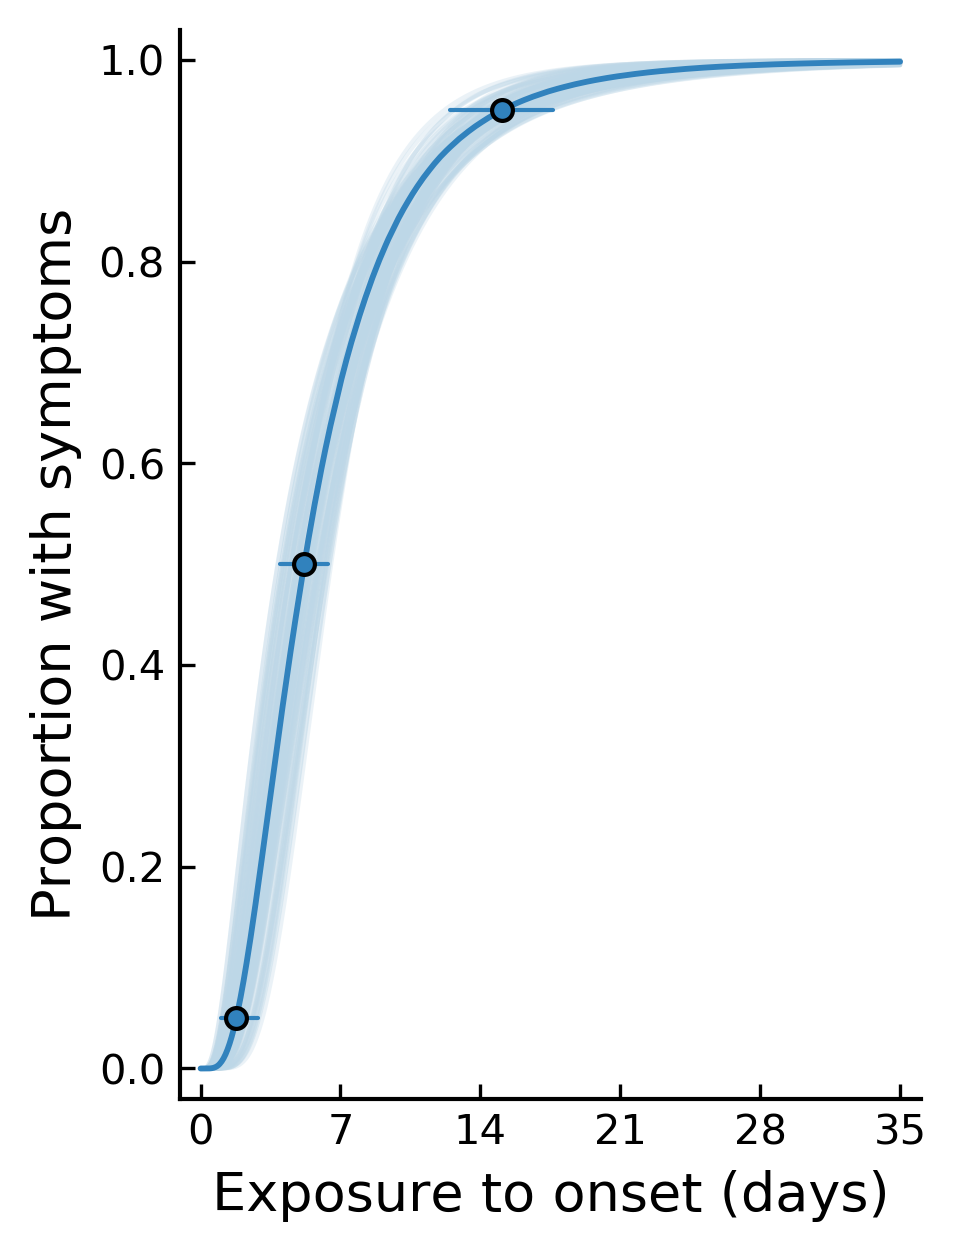

[6.414387770955816, 4.3350510988434445, 89.20007928785942, 174.40015857571885, 5.474215435589839, 7.329062070521157, 3.345405452763652, 5.951287936743855, 1.0262149489277375, 1.7875506473766902, 2.8691507899788546, 3.9972591175906547, 5.185611450522157, 6.3626853575293465, 12.459601972675264, 15.064109984202188, 17.631544700516034, 18.022288074875785, 23.547296122211723, 29.11958667351378]


In [7]:
filenames = ["data_incper", "data_incper_inclwuhan", "data_ons_hosp", "dthdata_hosp_dth", "dthdata_ons_dth", "dthdata_ons_hosp"]
tmax = [16, 16, 16, 35, 35, 35]
tmstps = [4, 4, 4, 7, 7, 7]

logmeans_inits = log.([3.2, 6.2, 3.7, 5., 7., 7.2])
logsd_inits = log.([2.8, 5.5, 6.2, 5., 3., 5.5])

idx = 1
for flname in filenames[idx:end]
    println(flname)
    df = DataFrame(CSV.read("../../data/$(flname).csv", missingstring="NA"))
    select!(df, [:EL, :ER, :SL, :SR, :tstar])
    rename!(df, Dict(:EL=>:E_L, :ER=>:E_R, :SL=>:S_L, :SR=>:S_R))
    
    if (idx==2)
        df[df[!,:E_L].==0,:E_L] .= df[df[!,:E_L].==0,:S_L] .- 28.
    end
    
    prog = ProgressThresh(-Inf, "Without truncation:") 
    function getNegativeLoglk(params)
        mean_ = exp(params[1]) # make the parameters positive
        sd_ = exp(params[2]) # make the parameters positive
        σ = sqrt(log(1+(sd_/mean_)^2))
        μ = log(mean_)-(σ^2/2)
        loglk = 0
        @inline function fs(t) 
            lognormalpdf(μ, σ, t)
        end
        @inline function Fs(t) 
            lognormalcdf(μ, σ, t)
        end
        # this for-loop is based on coarseData R package consolidated to one piece of code
        @simd for k in 1:nrow(df)
            E_R = df[k,:E_R]; E_L = df[k,:E_L]; S_R = df[k,:S_R]; S_L = df[k,:S_L]
            if (S_L!=S_R)
                if (S_L > E_R) # if the intervals do not overlap
                    loglk += log(hquadrature(e -> (Fs(S_R-e) - Fs(S_L-e)), E_L, E_R)[1])
                elseif (S_L > E_L)
                    loglk += log(hquadrature(e -> (Fs(S_R-e) - Fs(S_L-e)), E_L, S_L)[1] + 
                                 hquadrature(e -> Fs(S_R-e), S_L, E_R)[1])
                else
                    loglk += log(hquadrature(e -> Fs(S_R-e), E_L, E_R)[1])
                end
            else
                if (S_R > E_R) # if the intervals do not overlap
                    loglk += log(hquadrature(e -> fs(S_R-e), E_L, E_R)[1])
                elseif (S_L > E_L)
                    loglk += log(hquadrature(e -> fs(S_R-e), E_L, S_R)[1] + hquadrature(e -> fs(S_R-e), S_R, E_R)[1])
                end
            end
        end
        ProgressMeter.update!(prog, -loglk)
        return(-loglk)
    end
    
    println("* MLE")
    res0 = optimize(x -> getNegativeLoglk(x), [logmeans_inits[idx], logsd_inits[idx]], LBFGS())
    
    println("* Generating the results")
    logprms = Optim.minimizer(res0)
    prms = exp.(logprms)
    σ_ = sqrt(log(1+(prms[2]/prms[1])^2))
    println([log(prms[1])-(σ_^2/2),σ_])
    logmeans_inits[idx] = logprms[1]
    logsd_inits[idx] = logprms[2]

    negloglk = Optim.minimum(res0)
    AIC = -2*2 + 2negloglk

    res = [prms[1], prms[2], negloglk, AIC]
    
    println("* profile-based for the mean")
    step = .1
    y = x -> getNegativeLoglk([x, logprms[2]]) - negloglk - 1.92
    x0 = logprms[1]
    while y(x0)<0
        x0 -= step
    end
    logprms1_lower = fzero(y, (x0,logprms[1]))[1]

    x0 = logprms[1]
    while y(x0)<0
        x0 += step
    end
    logprms1_upper = fzero(y, (logprms[1], x0))[1]

    res_ = exp.([logprms1_lower, logprms1_upper])
    res = vcat(res, res_)
    means_samples = latin_hypercube_sampling([res_[1]],[res_[2]],nsamples);
    
    println("* profile-based for the SD")
    step = .1
    y = x -> getNegativeLoglk([logprms[1], x]) - negloglk - 1.92
    x0 = logprms[2]
    while y(x0)<0
        x0 -= step
    end
    logprms1_lower = fzero(y, (x0,logprms[2]))[1]

    x0 = logprms[2]
    while y(x0)<0
        x0 += step
    end
    logprms1_upper = fzero(y, (logprms[2], x0))[1]

    res_ = exp.([logprms1_lower, logprms1_upper])
    res = vcat(res, res_)
    SD_samples = latin_hypercube_sampling([res_[1]],[res_[2]],nsamples);
    
    println("* Creating a plot")
    t = [0:0.05:tmax[idx];]
    for idx in 1:nsamples
        σ = sqrt(log(1+(SD_samples[idx]/means_samples[idx])^2))
        μ = log(means_samples[idx])-(σ^2/2)
        if idx>1
            append!(y,[cdf.(LogNormal(μ, σ),t)])
        else 
            y = [cdf.(LogNormal(μ, σ),t)]
        end
    end
    plot(t, y[1:100], legend=false, color=clrs[1], alpha=.3, 
        grid=false, yticks = 0:0.2:1, xticks = 0:tmstps[idx]:tmax[idx],
        xlabel="Exposure to onset (days)", ylabel="Proportion with symptoms",
        size = (300,400), dpi = 300)
    plot!(t, median(hcat(y...);dims=2), color=clrs[2], lw=1.4)

    quantiles = [0.05,.5,.95,.99]
    for idx in 1:nsamples
        σ = sqrt(log(1+(SD_samples[idx]/means_samples[idx])^2))
        μ = log(means_samples[idx])-(σ^2/2)
        if idx>1
            append!(y,[quantile.(LogNormal(μ, σ),quantiles)])
        else 
            y = [quantile.(LogNormal(μ, σ),quantiles)]
        end
    end
    y = hcat(y...)
    for i in 1:length(quantiles)
        if i<=3
            plot!(quantile(y[i,:],[0.025,.975]),[quantiles[i],quantiles[i]], color=clrs[2])
        end
    end
    scatter!(median(y;dims=2)[1:(end-1)], quantiles[1:(end-1)], 
        color=clrs[2], markercolor=clrs[2], markersize=5) 

    Plots.pdf("$(results_dir)/gamma-$(flname)-no_truncation.pdf")
    
    for i in 1:length(quantiles)
        res_ = quantile(y[i,:],[0.025, .5, .975])
        res = vcat(res, res_)
    end
    
    println(res)
    
    res=reshape(vcat(["$(flname)","Lognormal", "no"],round.(res,digits=4)),1,length(res)+3)
    open(results_file, "a") do io
        writedlm(io, res, ',')
    end
    
    idx += 1
end

# With truncation

In [ ]:
filenames = ["data_incper", "data_incper_inclwuhan", "data_ons_hosp", "dthdata_hosp_dth", "dthdata_ons_dth", "dthdata_ons_hosp"]

logmeans_inits = log.([4.2, 4.2, 3.7, 5., 6.2, 7.2])
logsd_inits = log.([3.1, 6.05, 2.2, 5., 5.8, 5.5])

idx = 3
for flname in filenames[idx:end]
    println(flname)
    df = DataFrame(CSV.read("../../data/$(flname).csv", missingstring="NA"))
    select!(df, [:EL, :ER, :SL, :SR, :tstar])
    rename!(df, Dict(:EL=>:E_L, :ER=>:E_R, :SL=>:S_L, :SR=>:S_R))
    if (idx==2)
        df[df[!,:E_L].==0,:E_L] .= df[df[!,:E_L].==0,:S_L] .- 28.
    end
    
    prog = ProgressThresh(-Inf, "With truncation:") 
    function getNegativeLoglk(params)
        r = 0.14
        mean_ = exp(params[1]) # make the parameters positive
        sd_ = exp(params[2]) # make the parameters positive
        σ = sqrt(log(1+(sd_/mean_)^2))
        μ = log(mean_)-(σ^2/2)
        loglk = 0
        @inline function fs(t) 
            lognormalpdf(μ, σ, t)
        end
        @inline function Fs(t) 
            lognormalcdf(μ, σ, t)
        end
        # this for-loop is based on coarseData R package consolidated to one piece of code
        @simd for k in 1:nrow(df)
            E_R = df[k,:E_R]; E_L = df[k,:E_L]; S_R = df[k,:S_R]; S_L = df[k,:S_L]; tstar = df[k,:tstar]
            @inline function g(e)
                hquadrature(x -> r*exp(-r*x)/(1-exp(-r*x))*Fs(tstar-e-x), 0.001, tstar-e)[1]
            end
            if (S_L > E_R) # if the intervals do not overlap
                loglk += log(hquadrature(e -> (Fs(S_R-e) - Fs(S_L-e))/g(e), E_L, E_R)[1])
            elseif (S_L > E_L)
                loglk += log(hquadrature(e -> (Fs(S_R-e) - Fs(S_L-e))/g(e), E_L, S_L)[1] + 
                             hquadrature(e -> Fs(S_R-e)/g(e), S_L, E_R)[1])
            else
                loglk += log(hquadrature(e -> Fs(S_R-e)/g(e), E_L, E_R)[1])
            end
        end
        ProgressMeter.update!(prog, -loglk)
        return(-loglk)
    end
    
    println("* MLE")
    res0 = optimize(x -> getNegativeLoglk(x), [logmeans_inits[idx], logsd_inits[idx]])
    
    println("* Generating the results")
    logprms = Optim.minimizer(res0)
    prms = exp.(logprms)
    println(prms)
    logmeans_inits[idx] = logprms[1]
    logsd_inits[idx] = logprms[2]

    negloglk = Optim.minimum(res0)
    AIC = -2*2 + 2negloglk

    res = [prms[1], prms[2], negloglk, AIC]
    
    println("* profile-based for the mean")
    step = .1
    y = x -> getNegativeLoglk([x, logprms[2]]) - negloglk - 1.92
    x0 = logprms[1]
    while y(x0)<0
        x0 -= step
    end
    logprms1_lower = fzero(y, (x0,logprms[1]))[1]

    x0 = logprms[1]
    while y(x0)<0
        x0 += step
    end
    logprms1_upper = fzero(y, (logprms[1], x0))[1]

    res_ = exp.([logprms1_lower, logprms1_upper])
    res = vcat(res, res_)
    means_samples = latin_hypercube_sampling([res_[1]],[res_[2]],nsamples);
    
    println("* profile-based for the SD")
    step = .1
    y = x -> getNegativeLoglk([logprms[1], x]) - negloglk - 1.92
    x0 = logprms[2]
    while y(x0)<0
        x0 -= step
    end
    logprms1_lower = fzero(y, (x0,logprms[2]))[1]

    x0 = logprms[2]
    while y(x0)<0
        x0 += step
    end
    logprms1_upper = fzero(y, (logprms[2], x0))[1]

    res_ = exp.([logprms1_lower, logprms1_upper])
    res = vcat(res, res_)
    SD_samples = latin_hypercube_sampling([res_[1]],[res_[2]],nsamples);
    
    println("* Creating a plot")
    t = [0:0.05:tmax[idx];]
    for idx in 1:nsamples
        σ = sqrt(log(1+(SD_samples[idx]/means_samples[idx])^2))
        μ = log(means_samples[idx])-(σ^2/2)
        if idx>1
            append!(y,[cdf.(LogNormal(μ, σ),t)])
        else 
            y = [cdf.(LogNormal(μ, σ),t)]
        end
    end
    plot(t, y[1:100], legend=false, color=clrs[1], alpha=.3, 
        grid=false, yticks = 0:0.2:1, xticks = 0:tmstps[idx]:tmax[idx],
        xlabel="Exposure to onset (days)", ylabel="Proportion with symptoms",
        size = (300,400), dpi = 300)
    plot!(t, median(hcat(y...);dims=2), color=clrs[2], lw=1.4)

    quantiles = [0.05,.5,.95,.99]
    for idx in 1:nsamples
        σ = sqrt(log(1+(SD_samples[idx]/means_samples[idx])^2))
        μ = log(means_samples[idx])-(σ^2/2)
        if idx>1
            append!(y,[quantile.(LogNormal(μ, σ),quantiles)])
        else 
            y = [quantile.(LogNormal(μ, σ),quantiles)]
        end
    end
    y = hcat(y...)
    for i in 1:length(quantiles)
        if i<=3
            plot!(quantile(y[i,:],[0.025,.975]),[quantiles[i],quantiles[i]], color=clrs[2])
        end
    end
    scatter!(median(y;dims=2)[1:(end-1)], quantiles[1:(end-1)], 
        color=clrs[2], markercolor=clrs[2], markersize=5) 

    Plots.pdf("$(results_dir)/gamma-$(flname)-with_truncation.pdf")
    
    for i in 1:length(quantiles)
        res_ = quantile(y[i,:],[0.025, .5, .975])
        res = vcat(res, res_)
    end
    
    println(res)
    
    res=reshape(vcat(["$(flname)","Lognormal", "yes"],round.(res,digits=4)),1,length(res)+3)
    open(results_file, "a") do io
        writedlm(io, res, ',')
    end
    
    idx += 1
end

data_ons_hosp
* MLE


With truncation: (thresh = -Inf, value = 749.695)